<a href="https://colab.research.google.com/github/reyanshgupta/SEM_5_IVP/blob/main/IVP_Experiment_9_Region_Growing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def region_growing(image, seed, threshold):
  rows,cols = image.shape
  output_img = np.zeros_like(image)
  #queue for processing the region
  queue = []
  queue.append(seed)

  #seed point
  seed_value = image[seed[0],seed[1]]

  while queue:
    current_pixel = queue.pop(0)
    x,y = current_pixel

    #checking bounds
    if x<0 or y<0 or x>=rows or y>=cols:
      continue

    #checking if already visited
    if output_img[x,y] == 255:
      continue


    pixel_value = image[x,y]
    if abs(int(pixel_value)-int(seed_value)) <= threshold:
      output_img[x,y] = 255

      #adding neigbours to queue
      queue.append((x + 1, y))
      queue.append((x - 1, y))
      queue.append((x, y + 1))
      queue.append((x, y - 1))

  return output_img

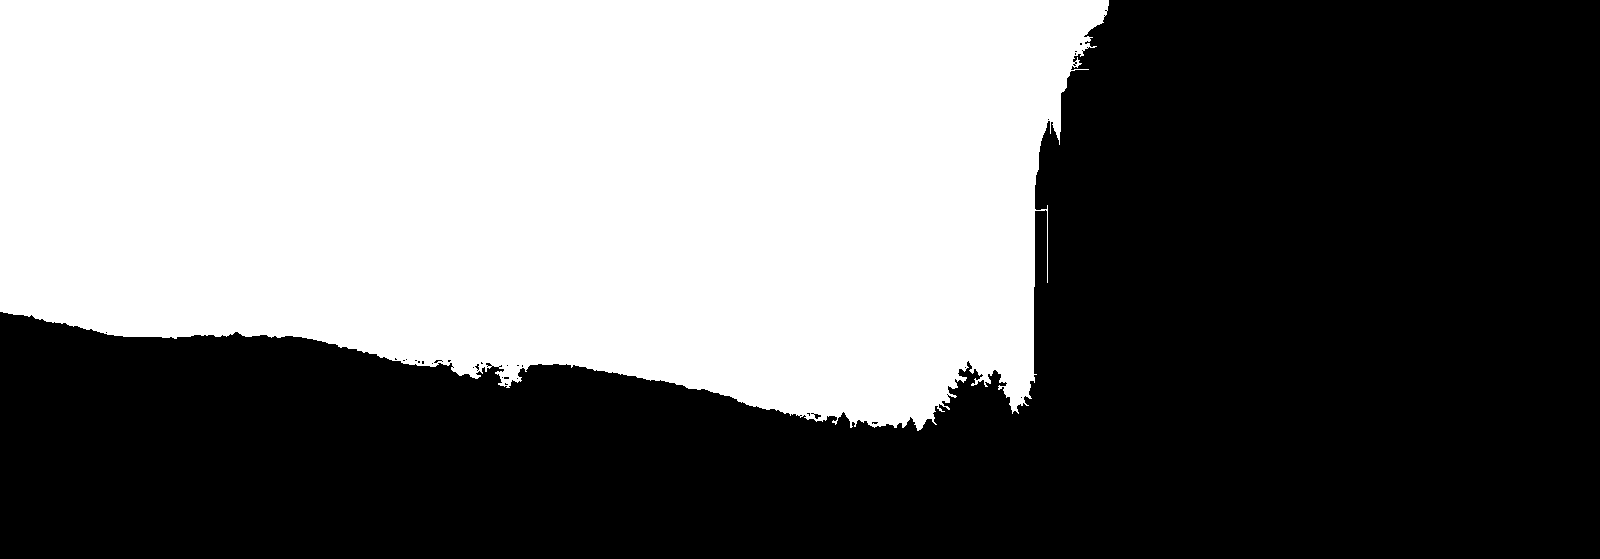

In [ ]:
hoover = cv2.imread("hoover.png",0)
seed_point=(100,100)
threshold = 20
output = region_growing(hoover,seed_point,threshold)
cv2_imshow(output)